In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

# For text preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yogita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yogita\AppData\Roaming\nltk_data...


True

In [4]:
# Load dataset
df = pd.read_csv(r'C:\Users\Yogita\OneDrive\Desktop\fake job\data\balanced_jop_posting.csv')

# Show basic info
print(df.shape)
df.head()


(1732, 18)


job_id                              title  \
0      99                    IC&E Technician   
1     145                       Forward Cap.   
2     174  Technician Instrument & Controls    
3     181                    Sales Executive   
4     216            IC&E Technician Mt Poso   

                             location            department  salary_range  \
0                   US, , Stocton, CA          Oil & Energy  95000-115000   
1                                 NaN                   NaN           NaN   
2                                  US  Power Plant & Energy           NaN   
3                     PK, SD, Karachi                 Sales           NaN   
4  US, CA, Bakersfield, CA / Mt. Poso          Oil & Energy  95000-115000   

                                     company_profile  \
0                                                ...   
1                                                NaN   
2  Edison International and Refined Resources hav...   
3                                                NaN   
4                                                ...   

                                         description  \
0  IC&amp;E Technician | Bakersfield, CA Mt. Poso...   
1  The group has raised a fund for the purchase o...   
2  Technician Instrument &amp; ControlsLocation D...   
3                                    Sales Executive   
4  IC&amp;E Technician | Bakersfield, CA Mt. Poso...   

                                        requirements  \
0  QualificationsKnowledge, Skills &amp; Abilitie...   
1                                                NaN   
2  JOB QUALIFICATIONS-Ability to understand proce...   
3                                    Sales Executive   
4   QualificationsKnowledge, Skills &amp; Abiliti...   

                                            benefits  telecommuting  \
0  BENEFITSWhat is offered:Competitive compensati...              0   
1                                                NaN              0   
2  we are a team of almost 8,000 employees who he...              0   
3                                    Sales Executive              0   
4  BENEFITSWhat is offered:Competitive compensati...              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              1       Full-time    Mid-Senior level   
1                 0              0             NaN                 NaN   
2                 1              1       Full-time    Mid-Senior level   
3                 0              0             NaN                 NaN   
4                 1              1       Full-time    Mid-Senior level   

          required_education                             industry function  \
0  High School or equivalent                         Oil & Energy    Other   
1                        NaN                                  NaN      NaN   
2              Certification  Electrical/Electronic Manufacturing    Other   
3                        NaN                                  NaN    Sales   
4  High School or equivalent                         Oil & Energy    Other   

   fraudulent  
0           1  
1           1  
2           1  
3           1  
4           1

In [6]:
# Missing values
print(df.isnull().sum())

# How many null rows?
print(f"Total missing values: {df.isnull().sum().sum()}")


job_id                    0
title                     0
location                 40
department             1108
salary_range           1372
company_profile         728
description               1
requirements            283
benefits                700
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         383
required_experience     777
required_education      852
industry                502
function                666
fraudulent                0
dtype: int64
Total missing values: 7412


In [7]:
# Fill important text fields with empty string
important_cols = ['title', 'company_profile', 'description', 'requirements']
for col in important_cols:
    df[col] = df[col].fillna('')


In [8]:
# Combine useful columns into one text
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements']


In [9]:
# Text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()                                        # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()                                        # Tokenize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # Remove stopwords & Lemmatize
    return ' '.join(words)


In [10]:
# Clean the 'text' field
df['cleaned_text'] = df['text'].apply(clean_text)


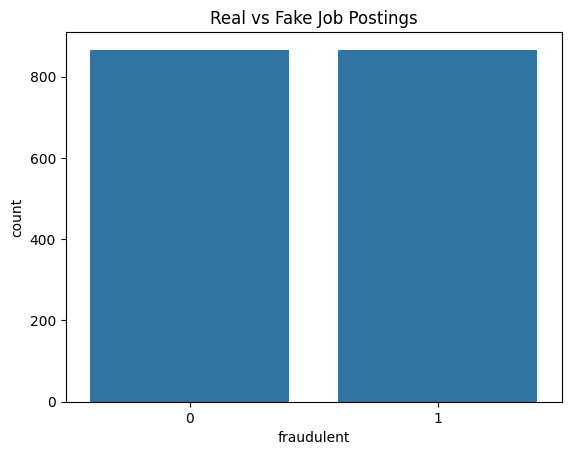

fraudulent
1    866
0    866
Name: count, dtype: int64


In [11]:
# Plot class distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Real vs Fake Job Postings')
plt.show()

# Print counts
print(df['fraudulent'].value_counts())


In [12]:
# Save cleaned dataset
df.to_csv('../data/cleaned_fake_job_postings.csv', index=False)
